# In this Lab I will try to correct previous Lab's errors and start to compile all data information

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
data = pd.read_csv("C:/Users/JC88Main/Day5/Lab6/lab-customer-analysis-round-6-master/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols
data = data.rename(columns={'unnamed: 0':'index'})

In [7]:
list(data.select_dtypes(['number'])) #Numerical columns

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [8]:
list(data.select_dtypes(['object'])) #Categorical columns

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size']

In [9]:
data.isna().sum()
round(data.isna().sum()/data.shape[0],4)*100

customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

In [10]:
data['state'] = data['state'].fillna('NA')
data['vehicle class'] = data['vehicle class'].fillna('NA')
data['vehicle size'] = data['vehicle size'].fillna('NA')

In [11]:
#Datetime format - Extract the months from the dataset and store in a separate column.
#Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [12]:
data['date'] = pd.to_datetime(data['effective to date'])
data['month'] = data['date'].dt.month

In [13]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,date,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03,2


In [14]:
data_filtered = data[data['month']<= 3]

In [15]:
data_filtered

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,date,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011-02-10,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011-02-12,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011-02-06,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011-02-03,2


In [16]:
data['month'].unique()

array([2, 1], dtype=int64)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   object        
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [18]:
#Plotting Data

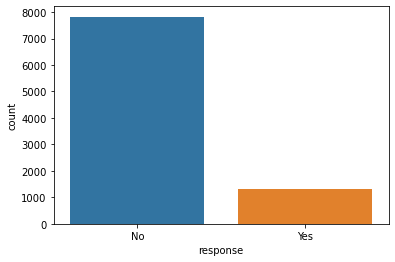

In [19]:
ax = sns.countplot(x="response", data=data) #Total number os responses

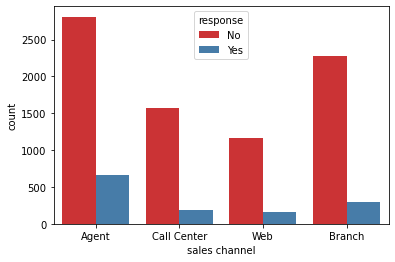

In [20]:
ax = sns.countplot(x="sales channel",  hue="response", data=data, palette = "Set1") #Response rate by the sales channel

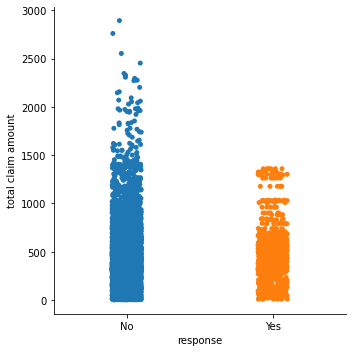

In [21]:
sns.catplot(x="response", y="total claim amount", order=["No", "Yes"], data=data) #Response rate by the total claim amount

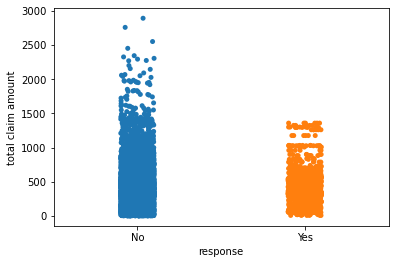

In [22]:
ax = sns.stripplot(x="response", y="total claim amount", data=data)

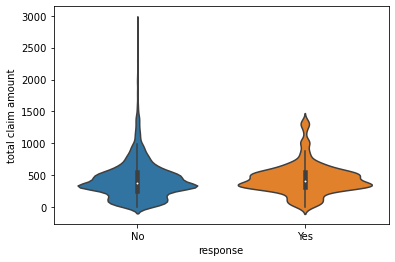

In [23]:
ax = sns.violinplot(x="response", y="total claim amount", data=data)

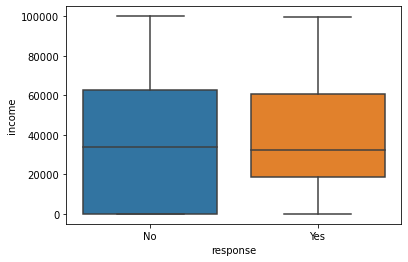

In [24]:
ax = sns.boxplot(x="response", y="income", data=data) #Response rate by income

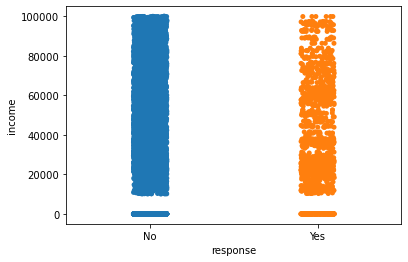

In [25]:
ax = sns.stripplot(x="response", y="income", data=data)

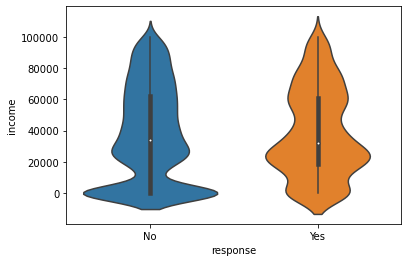

In [26]:
ax = sns.violinplot(x="response", y="income", data=data)

In [27]:
#Check the data types of the columns
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [28]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                        object
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [29]:
data['number of open complaints'] = data['number of open complaints'].astype(object)
data['number of policies'] = data['number of policies'].astype(object)

numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = object)

In [30]:
print(numerical.shape)
numerical.head()

(9134, 7)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,total claim amount,month
0,2763.519279,56274,69,32,5,384.811147,2
1,6979.535903,0,94,13,42,1131.464935,1
2,12887.431650,48767,108,18,38,566.472247,2
3,7645.861827,0,106,18,65,529.881344,1
4,2813.692575,43836,73,12,44,138.130879,2


In [31]:
print(categorical.shape)
categorical.head()

(9134, 18)


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#Do the distributions for different numerical variables look like a normal distribution

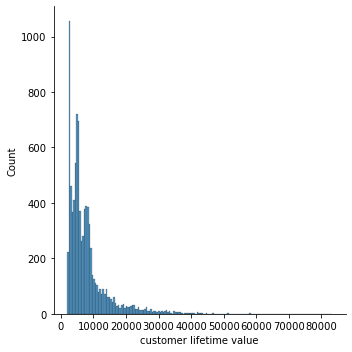

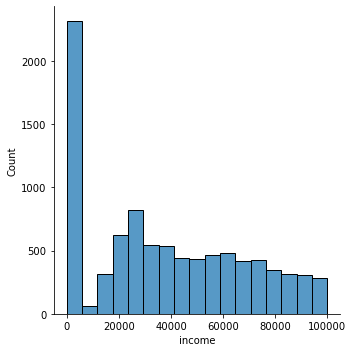

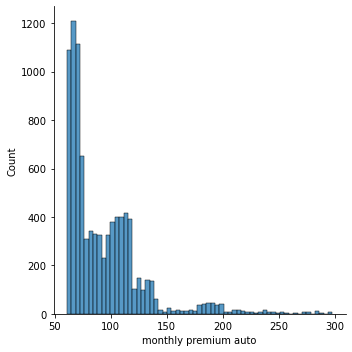

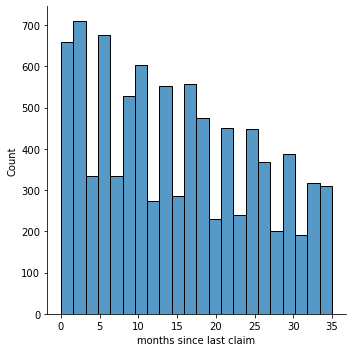

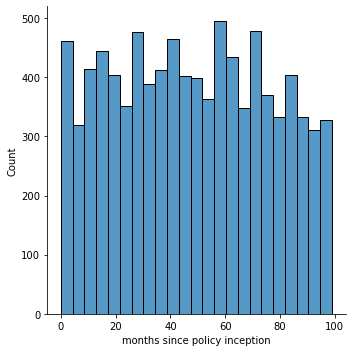

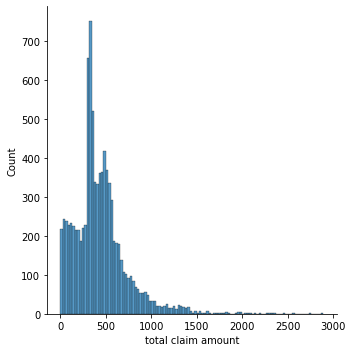

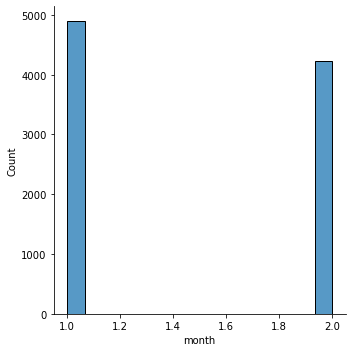

In [33]:
for i in range(7):
    sns.displot(numerical.iloc[:,i])
    plt.show()

In [34]:
#Histograms

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'total claim amount'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

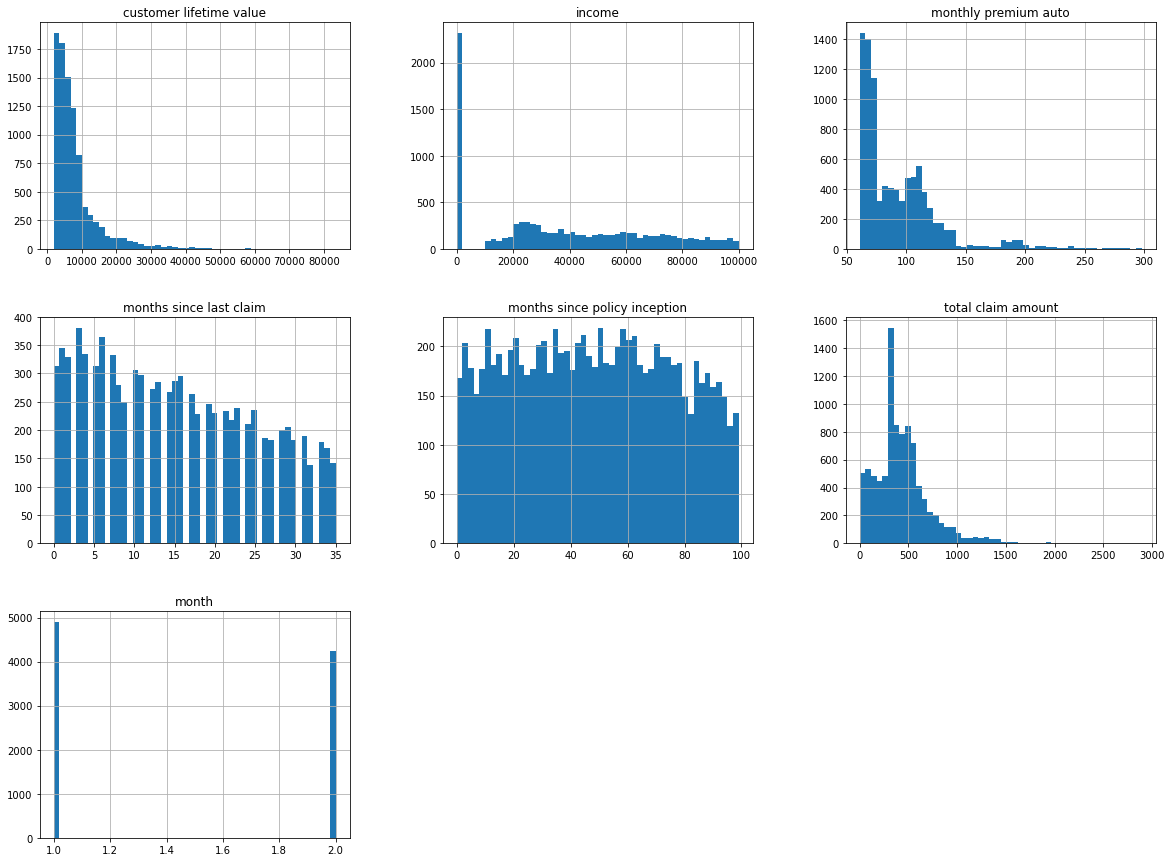

In [35]:
numerical.hist(bins=50, figsize=(20,15))

In [36]:
#Do the distributions for different numerical variables look like a normal distribution


In [37]:
#All distributions are skewd, not normal

In [38]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

In [39]:
correlations_matrix = numerical.corr() #Correlation
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,total claim amount,month
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254,0.000169
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017,0.011467
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563,-0.020921
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335,0.011010
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,0.006820,1.000000


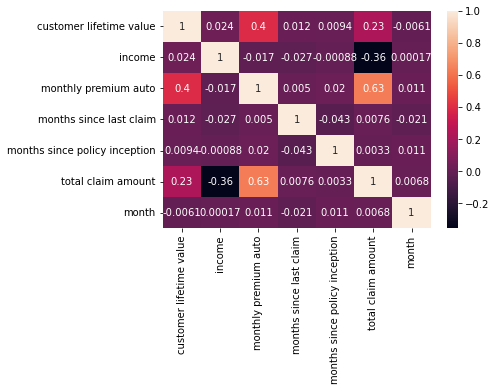

In [40]:
sns.heatmap(correlations_matrix, annot=True)  # No 0.9 correlation
plt.show()

In [41]:
#X-y split.
#Normalize (numerical).

In [42]:
Y=data["total claim amount"]
X=data.drop(["total claim amount"],axis=1)

X.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,date,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,2


In [43]:
Y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total claim amount, dtype: float64

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   object        
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [45]:
x_num=X.select_dtypes(np.number)
x_cat=X.select_dtypes(np.object)

C:\Users\JoãoCabral\AppData\Local\Temp\ipykernel_3672\2977128370.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_cat=X.select_dtypes(np.object)


In [46]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly premium auto           9134 non-null   int64  
 3   months since last claim        9134 non-null   int64  
 4   months since policy inception  9134 non-null   int64  
 5   month                          9134 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 428.3 KB


In [47]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer                   9134 non-null   object
 1   state                      9134 non-null   object
 2   response                   9134 non-null   object
 3   coverage                   9134 non-null   object
 4   education                  9134 non-null   object
 5   effective to date          9134 non-null   object
 6   employmentstatus           9134 non-null   object
 7   gender                     9134 non-null   object
 8   location code              9134 non-null   object
 9   marital status             9134 non-null   object
 10  number of open complaints  9134 non-null   object
 11  number of policies         9134 non-null   object
 12  policy type                9134 non-null   object
 13  policy                     9134 non-null   object
 14  renew of

In [48]:
#Numerical normalization

In [49]:
x_num.apply(skew)

customer lifetime value          3.031782
income                           0.286840
monthly premium auto             2.123198
months since last claim          0.278541
months since policy inception    0.040158
month                            0.145335
dtype: float64

In [50]:
#Data normalization

In [51]:
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num) 
print(x_normalized.shape)
x_normalized

(9134, 6)


array([[4.90491254e-02, 9.98795450e-01, 1.22466656e-03, 5.67961304e-04,
        8.87439537e-05, 3.54975815e-05],
       [9.99889475e-01, 0.00000000e+00, 1.34664556e-02, 1.86238216e-03,
        6.01692699e-03, 1.43260166e-04],
       [2.55493903e-01, 9.66807936e-01, 2.14110479e-03, 3.56850798e-04,
        7.53351684e-04, 3.96500886e-05],
       ...,
       [9.99934897e-01, 0.00000000e+00, 1.04110249e-02, 1.10234381e-03,
        4.53185788e-03, 2.44965291e-04],
       [3.24391167e-01, 9.45912823e-01, 4.13871888e-03, 1.46579627e-03,
        1.29334965e-04, 8.62233101e-05],
       [9.98972369e-01, 0.00000000e+00, 2.94508717e-02, 1.14743656e-03,
        3.44230968e-02, 7.64957707e-04]])

In [52]:
x_num_norm=pd.DataFrame(x_normalized)
x_num_norm.head()

,0,1,2,3,4,5
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000035
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000143
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000131
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000046


In [53]:
x_num_norm.columns=x_num.columns
x_num_norm.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,month
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000035
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000143
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000131
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000046


In [54]:
x_cat.head()

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [55]:
x_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'number of open complaints', 'number of policies',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [56]:
x_cat.drop(["customer",'effective to date'],axis=1,inplace=True)
x_cat.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [57]:
en_x = OneHotEncoder(handle_unknown='ignore') 
en_x.fit(x_cat)

en_x.categories_

en_x_array=en_x.transform(x_cat).toarray()
en_x_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [58]:
x_cat_en=pd.DataFrame(en_x_array)
x_cat_en.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
col_list=list([x_cat["state"].unique()])
print(type(col_list))
print(col_list)

<class 'list'>
[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)]


In [60]:
x_cat_en.columns=list(en_x.get_feature_names())
x_cat_en.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x13_Web,x14_Four-Door Car,x14_Luxury Car,x14_Luxury SUV,x14_SUV,x14_Sports Car,x14_Two-Door Car,x15_Large,x15_Medsize,x15_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
x_new=pd.concat([x_num_norm,x_cat_en],axis=1)
print(x_new.shape)
x_new.head()

(9134, 78)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,month,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,...,x13_Web,x14_Four-Door Car,x14_Luxury Car,x14_Luxury SUV,x14_SUV,x14_Sports Car,x14_Two-Door Car,x15_Large,x15_Medsize,x15_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000035,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000143,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000131,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000046,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
#Train-test split
#Apply linear regression

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_new,Y,test_size=0.3,random_state=100)

In [64]:
lm=linear_model.LinearRegression() #Linear regression
model=lm.fit(x_train,y_train)
predictions=lm.predict(x_test)
r2_score(y_test,predictions)

0.772393926944744

In [65]:
metrics.mean_squared_error(y_test,predictions) #MSE

18170.70654772848

In [66]:
metrics.mean_squared_error(y_test,predictions,squared=False)#ME

134.79876315355597

In [67]:
(metrics.mean_squared_error(y_test,predictions,squared=False))**0.5 #RMSE

11.610286953971292

In [68]:
metrics.mean_absolute_error(y_test,predictions) #MAE

96.50103492630427

In [69]:
metrics.r2_score(y_test,predictions) #R2

0.772393926944744

In [70]:
#Train predictions

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x_new,Y,test_size=0.3,random_state=100)

In [72]:
x_train.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,month,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,...,x13_Web,x14_Four-Door Car,x14_Luxury Car,x14_Luxury SUV,x14_SUV,x14_Sports Car,x14_Two-Door Car,x15_Large,x15_Medsize,x15_Small
8720,0.339976,0.940416,0.005139,0.002309,0.001117,0.000074,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6092,0.552683,0.833386,0.002920,0.000107,0.000997,0.000036,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1412,0.082392,0.996599,0.001077,0.000114,0.000669,0.000016,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4717,0.070642,0.997500,0.001735,0.000468,0.000661,0.000028,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3725,0.999930,0.000000,0.011626,0.001873,0.001227,0.000065,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [73]:
y_train.head()

8720     331.200000
6092     393.600000
1412     294.284951
4717     343.139611
3725    1296.000000
Name: total claim amount, dtype: float64

In [74]:
y_pred_train = lm.predict(x_train)
r2_score(y_train, y_pred_train)

0.7617523014558198

In [75]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_pred_train)
print(mae_train)

96.31283722743625


#Lab 7 START

In [80]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(x_train)

print(r2_score(y_train, y_pred_train))

#MAE ON train data
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_pred_train)
print(mae_train)

#MSE on train DATA
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

#RMSE ON train DATA
import math
rmse = math.sqrt(mse)
print(rmse)

0.7617523014558198
96.31283722743625
20560.827553074512
143.3904723232144


In [84]:
y = numerical[['total claim amount']]
X= numerical.drop(['total claim amount'], axis=1)

In [88]:
cols = list(y.columns)
cols
y_log = list(map(np.log,y['total claim amount']))
y_log = pd.DataFrame(y_log, columns = cols)
y_log

,total claim amount
0,5.952753
1,7.031268
2,6.339428
3,6.272653
4,4.928202
...,...
9129,5.289452
9130,5.938064
9131,6.673026
9132,6.538429


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_log, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
#x_num_norm
#x_cat_en
#x_new

